In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# query_url

In [6]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
hum = []
wind = []
cloud = []
country = []
date = []
new_city = []

x = 0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_city.append(city)        
        x = x + 1
        print(f"Retrieving info for city number {x}:{city}")
        print(f"The temperature information received is: {response['main']['temp']} °C")
        
    except:
        x = x + 1
        print(f"Info for city number {x}:{city} not found. Skipping...")
        pass

Retrieving info for city number 1:la huacana
The temperature information received is: 26.07 °C
Retrieving info for city number 2:aksarayskiy
The temperature information received is: 12.89 °C
Retrieving info for city number 3:wanning
The temperature information received is: 27.22 °C
Retrieving info for city number 4:touros
The temperature information received is: 24 °C
Retrieving info for city number 5:comodoro rivadavia
The temperature information received is: 19 °C
Retrieving info for city number 6:avarua
The temperature information received is: 29 °C
Retrieving info for city number 7:bredasdorp
The temperature information received is: 9 °C
Retrieving info for city number 8:ribeira grande
The temperature information received is: 14.26 °C
Retrieving info for city number 9:alta floresta
The temperature information received is: 21.22 °C
Retrieving info for city number 10:albany
The temperature information received is: 12.94 °C
Retrieving info for city number 11:tuatapere
The temperature 

Retrieving info for city number 93:lebu
The temperature information received is: 12.81 °C
Info for city number 94:barentsburg not found. Skipping...
Retrieving info for city number 95:champerico
The temperature information received is: 18.88 °C
Retrieving info for city number 96:the valley
The temperature information received is: 25.7 °C
Retrieving info for city number 97:varnamo
The temperature information received is: 3.64 °C
Info for city number 98:basyanovskiy not found. Skipping...
Retrieving info for city number 99:kodinar
The temperature information received is: 27.82 °C
Retrieving info for city number 100:oktyabrskiy
The temperature information received is: 3.62 °C
Retrieving info for city number 101:tiksi
The temperature information received is: 0.01 °C
Retrieving info for city number 102:sao filipe
The temperature information received is: 22.77 °C
Retrieving info for city number 103:port moresby
The temperature information received is: 30 °C
Retrieving info for city number 10

Retrieving info for city number 182:ancud
The temperature information received is: 11.52 °C
Info for city number 183:bandar penggaram not found. Skipping...
Retrieving info for city number 184:lagoa
The temperature information received is: 13.66 °C
Retrieving info for city number 185:bajil
The temperature information received is: 28.24 °C
Retrieving info for city number 186:dikson
The temperature information received is: -14.09 °C
Retrieving info for city number 187:shizunai
The temperature information received is: 4.96 °C
Retrieving info for city number 188:dobretu
The temperature information received is: 10.84 °C
Retrieving info for city number 189:chapais
The temperature information received is: 10 °C
Retrieving info for city number 190:yellowknife
The temperature information received is: -1.42 °C
Retrieving info for city number 191:kavieng
The temperature information received is: 29.28 °C
Retrieving info for city number 192:san quintin
The temperature information received is: 18.3 

Retrieving info for city number 271:kodiak
The temperature information received is: 6 °C
Retrieving info for city number 272:zarechnyy
The temperature information received is: 5 °C
Retrieving info for city number 273:eureka
The temperature information received is: 13.56 °C
Retrieving info for city number 274:vanderhoof
The temperature information received is: 13.8 °C
Retrieving info for city number 275:hirara
The temperature information received is: 24.59 °C
Retrieving info for city number 276:tura
The temperature information received is: 32.52 °C
Retrieving info for city number 277:san cristobal
The temperature information received is: 24 °C
Retrieving info for city number 278:avera
The temperature information received is: 22.03 °C
Retrieving info for city number 279:jojoima
The temperature information received is: 23.14 °C
Retrieving info for city number 280:meulaboh
The temperature information received is: 27.07 °C
Retrieving info for city number 281:evensk
The temperature informati

Retrieving info for city number 361:cocachacra
The temperature information received is: 18.77 °C
Retrieving info for city number 362:kerrville
The temperature information received is: 17.21 °C
Retrieving info for city number 363:nyrob
The temperature information received is: -0.21 °C
Retrieving info for city number 364:saint-joseph
The temperature information received is: 22.6 °C
Retrieving info for city number 365:goundam
The temperature information received is: 33.8 °C
Info for city number 366:karkaralinsk not found. Skipping...
Retrieving info for city number 367:north myrtle beach
The temperature information received is: 21.99 °C
Retrieving info for city number 368:sitka
The temperature information received is: 7 °C
Retrieving info for city number 369:nazca
The temperature information received is: 20.93 °C
Retrieving info for city number 370:cabra
The temperature information received is: 10 °C
Retrieving info for city number 371:udachnyy
The temperature information received is: -2.

Retrieving info for city number 450:timra
The temperature information received is: -1.62 °C
Retrieving info for city number 451:alexandria
The temperature information received is: 19 °C
Retrieving info for city number 452:uirauna
The temperature information received is: 23.19 °C
Retrieving info for city number 453:airai
The temperature information received is: 23.29 °C
Retrieving info for city number 454:severodvinsk
The temperature information received is: -2 °C
Retrieving info for city number 455:acarau
The temperature information received is: 25.29 °C
Retrieving info for city number 456:karatsu
The temperature information received is: 21 °C
Retrieving info for city number 457:altay
The temperature information received is: 19.08 °C
Retrieving info for city number 458:gambela
The temperature information received is: 22.71 °C
Retrieving info for city number 459:mayo
The temperature information received is: 25.7 °C
Retrieving info for city number 460:inta
The temperature information rec

Info for city number 543:polikhnitos not found. Skipping...
Retrieving info for city number 544:lata
The temperature information received is: 8.93 °C
Retrieving info for city number 545:moctezuma
The temperature information received is: 21.54 °C
Retrieving info for city number 546:antalaha
The temperature information received is: 23.51 °C
Retrieving info for city number 547:bartica
The temperature information received is: 25 °C
Retrieving info for city number 548:beringovskiy
The temperature information received is: -1.25 °C
Retrieving info for city number 549:notse
The temperature information received is: 24.47 °C
Retrieving info for city number 550:codrington
The temperature information received is: 22.31 °C
Retrieving info for city number 551:aginskoye
The temperature information received is: 1.87 °C
Retrieving info for city number 552:luanda
The temperature information received is: 24 °C
Retrieving info for city number 553:tooele
The temperature information received is: 21.59 °C
Re

In [7]:
weather_dict = {
    "City": new_city,
    "Lat": lat,
    "Lon": lat,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date

}


In [8]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la huacana,18.9667,18.9667,26.07,53,73,2.30,MX,1619747345
1,aksarayskiy,46.7924,46.7924,13.00,50,0,5.00,RU,1619747345
2,wanning,18.8003,18.8003,27.22,72,75,1.18,CN,1619747047
3,touros,-5.1989,-5.1989,24.00,94,20,3.09,BR,1619747069
4,comodoro rivadavia,-45.8667,-45.8667,19.00,45,0,2.06,AR,1619747102


In [9]:
weather_data.to_csv(output_data_file, index=True)

In [10]:
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.388166,20.388166,16.467611,70.224779,53.992920,3.125646,1.619747e+09
std,33.199385,33.199385,10.290869,22.125787,39.156441,2.023110,1.189291e+02
min,-54.800000,-54.800000,-14.090000,7.000000,0.000000,0.090000,1.619747e+09
25%,-7.470600,-7.470600,9.000000,61.000000,13.000000,1.570000,1.619747e+09
50%,24.781100,24.781100,18.630000,75.000000,62.000000,2.570000,1.619747e+09
75%,47.666600,47.666600,25.000000,87.000000,93.000000,4.120000,1.619747e+09
max,78.218600,78.218600,33.800000,100.000000,100.000000,11.790000,1.619748e+09


In [11]:
weather_data_clean = weather_data.loc[weather_data['Humidity'] < 100,:]
weather_data_clean

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la huacana,18.9667,18.9667,26.07,53,73,2.30,MX,1619747345
1,aksarayskiy,46.7924,46.7924,13.00,50,0,5.00,RU,1619747345
2,wanning,18.8003,18.8003,27.22,72,75,1.18,CN,1619747047
3,touros,-5.1989,-5.1989,24.00,94,20,3.09,BR,1619747069
4,comodoro rivadavia,-45.8667,-45.8667,19.00,45,0,2.06,AR,1619747102
...,...,...,...,...,...,...,...,...,...
560,bilisht,40.6275,40.6275,11.59,66,2,1.26,AL,1619747557
561,oussouye,12.4850,12.4850,22.90,65,63,4.66,SN,1619747558
562,salalah,17.0151,17.0151,28.00,83,75,1.54,OM,1619747558
563,sobolevo,54.4299,54.4299,7.51,90,100,6.59,RU,1619747558


In [12]:
len(weather_data)


565

In [13]:
len(weather_data_clean)

549

In [14]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = weather_data.loc[weather_data['Humidity'] >= 100,:]
humidity_index

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
14,clyde river,70.4692,70.4692,-5.00,100,75,3.09,CA,1619747337
45,barcelos,41.5388,41.5388,10.00,100,0,1.74,PT,1619747361
58,vaini,-21.2000,-21.2000,24.00,100,75,5.14,TO,1619747210
80,broome,42.2506,42.2506,13.89,100,90,3.09,US,1619747375
132,belyy yar,53.6039,53.6039,6.00,100,75,1.00,RU,1619747395
179,cabedelo,-6.9811,-6.9811,24.00,100,40,2.06,BR,1619747416
196,iqaluit,63.7506,63.7506,0.00,100,90,2.06,CA,1619747423
197,pitimbu,-7.4706,-7.4706,24.00,100,40,2.06,BR,1619747423
254,san cristobal,7.7669,7.7669,24.00,100,75,1.54,VE,1619747445
271,ingham,42.6000,42.6000,10.00,100,40,1.54,US,1619747451


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [15]:
## Latitude vs. Temperature Plot 

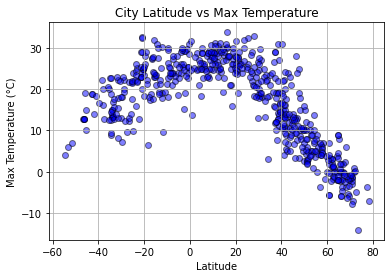

In [16]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Max Temp'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
# Show plot
plt.show()

## Latitude vs. Humidity Plot

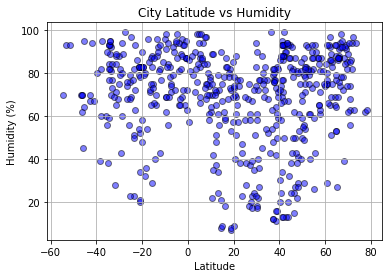

In [18]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Humidity'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

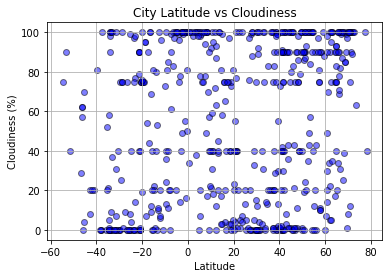

In [19]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Cloudiness'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

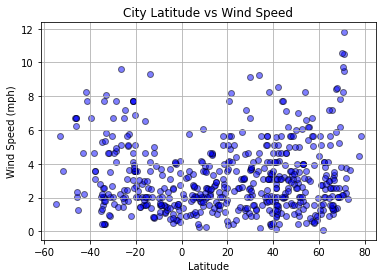

In [20]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Wind Speed'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid()
# Show plot
plt.show()

## Linear Regression

In [21]:

Northern_hemis = weather_data.loc[weather_data['Lat'] >= 0,:]
Northern_hemis

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la huacana,18.9667,18.9667,26.07,53,73,2.30,MX,1619747345
1,aksarayskiy,46.7924,46.7924,13.00,50,0,5.00,RU,1619747345
2,wanning,18.8003,18.8003,27.22,72,75,1.18,CN,1619747047
7,ribeira grande,38.5167,38.5167,14.26,64,100,3.43,PT,1619747088
9,albany,42.6001,42.6001,13.33,90,100,0.45,US,1619747149
...,...,...,...,...,...,...,...,...,...
560,bilisht,40.6275,40.6275,11.59,66,2,1.26,AL,1619747557
561,oussouye,12.4850,12.4850,22.90,65,63,4.66,SN,1619747558
562,salalah,17.0151,17.0151,28.00,83,75,1.54,OM,1619747558
563,sobolevo,54.4299,54.4299,7.51,90,100,6.59,RU,1619747558


In [22]:

Southern_hemis = weather_data.loc[weather_data['Lat'] < 0,:]
Southern_hemis

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,touros,-5.1989,-5.1989,24.00,94,20,3.09,BR,1619747069
4,comodoro rivadavia,-45.8667,-45.8667,19.00,45,0,2.06,AR,1619747102
5,avarua,-21.2078,-21.2078,29.00,79,40,4.12,CK,1619747286
6,bredasdorp,-34.5322,-34.5322,9.00,93,5,2.57,ZA,1619747346
8,alta floresta,-9.8756,-9.8756,21.22,96,73,0.89,BR,1619747347
...,...,...,...,...,...,...,...,...,...
538,antofagasta,-23.6500,-23.6500,16.00,82,0,3.09,CL,1619747396
540,poum,-20.2333,-20.2333,25.42,58,76,6.92,NC,1619747338
541,rio tercero,-32.1730,-32.1730,13.89,69,0,2.24,AR,1619747550
546,lakatoro,-16.0999,-16.0999,27.73,65,69,6.52,VU,1619747552


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7972114478771052


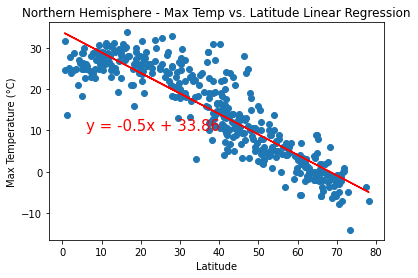

In [23]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4262492316527161


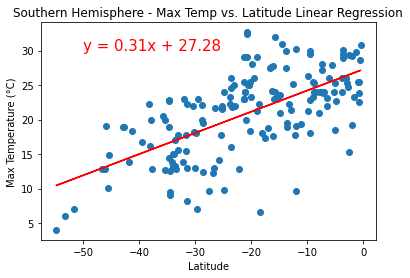

In [44]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.02177071061647387


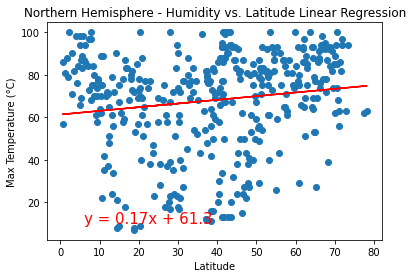

In [45]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.017277964364300923


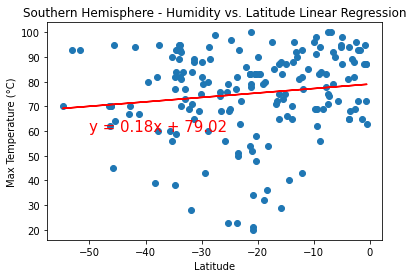

In [46]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.017087361509036253


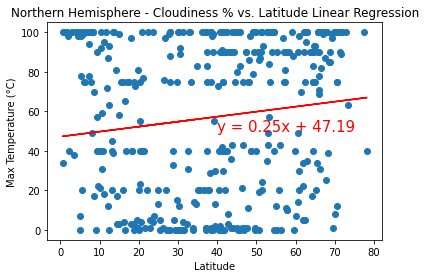

In [47]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.07820018453406609


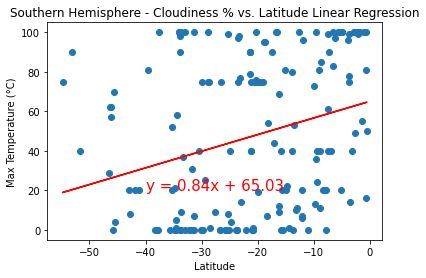

In [48]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03633959191654587


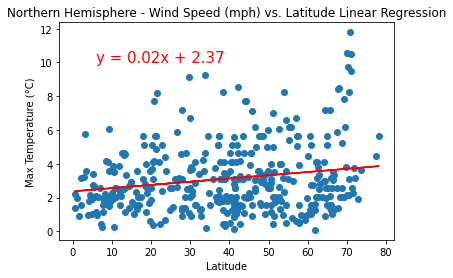

In [49]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.10941969891655601


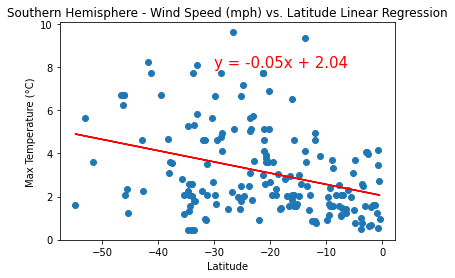

In [50]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()